# 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import random

def spin(times=5):
    for i in range(times):
#         input()
        print(f"time {i+1}: {random.randint(0, 36)}")

spin()

time 1: 13
time 2: 0
time 3: 25
time 4: 35
time 5: 33


# 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [2]:
"""На примере монетки понятней будет"""

A = 0.5
B = 0.5

p_incompatible = A + B
p_independent = A * B
p_dependent = A * (B / A)
    
print("Несовместны:", p_incompatible)
print("Независимы:", p_independent)
print("Зависимы:", p_dependent)

Несовместны: 1.0
Независимы: 0.25
Зависимы: 0.5


# 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

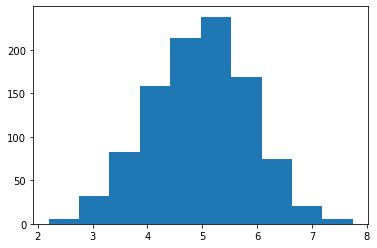

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(10, 1000)
x = x.sum(axis=0)
plt.hist(x, bins=10)
plt.show()

# 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [4]:
def factorial(x):
    res = 1
    for i in range(2, x+1):
        res *= i
        
    return res

In [5]:
k, n = 0, 10

x = 0
for i in range(4):
    x += np.random.randint(0, 2, n)

for i in range(0, n):
    if x[i] == 2:
        k += 1
        
c = factorial(n) / (factorial(k) * factorial(n - k))
p = c/2**n

print(f"k={k}, n={n}, k/n={k/n}, c={c}, p={p}")

k=3, n=10, k/n=0.3, c=120.0, p=0.1171875


# 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [6]:
k, n = 0, 20

x = 0
for i in range(4):
    x += np.random.randint(0, 2, n)

for i in range(0, n):
    if x[i] == 2:
        k += 1
        
c = factorial(n) / (factorial(k) * factorial(n - k))
p = c/2**n

print(f"k={k}, n={n}, k/n={k/n}, c={c}, p={p}")

k=7, n=20, k/n=0.35, c=77520.0, p=0.0739288330078125


# 4. (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [7]:
import itertools

for p in itertools.permutations("012", 3):
    print(''.join(p))

012
021
102
120
201
210


# 5. (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле

0.6710217897285476 0.16011543375590087
0.6710217897285465 0.1601154337559014
Коеффициент корреляции: 3.875258512380518e+29


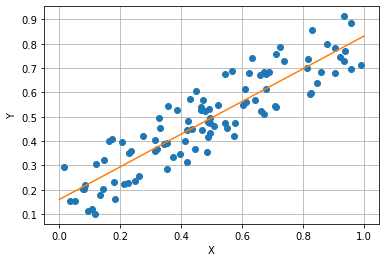

In [8]:
n = 100
r = 0.7

x = np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

a = (np.sum(x) * np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x)) / n

R = np.sum((x - x.mean()) * (y - y.mean())) / (np.sum(x - x.mean())**2 * np.sum(y - y.mean())**2)**0.5

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=-1)[0]

print(a, b)
print(a1, b1)
print(f"Коеффициент корреляции: {R}")

plt.plot([0, 1], [b, a+b])
plt.show()